In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

### OLS

In [6]:
data = load_boston()
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [12]:
X = pd.DataFrame(data = data["data"], columns = data["feature_names"])
y = pd.DataFrame(data = data["target"], columns = ["Price"])
boston = pd.concat([X, y], axis = 1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
lr = LinearRegression(n_jobs=7, normalize = True)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=7, normalize=True)

Linear Regression assumes that all the feature columns are linearly independent of each other. If there would be any significant correlation between 2 columns the feature matrix becomes close to singnular matrix, as the result the OLS estimate becomes highly sensitive to the random error of observed target, producing a large variance. This situation of is called **multicollinearity**.

In [18]:
print("The coefficient of Regression line: ",lr.coef_[0])
print("The coefficient of Regression intercept: ",lr.intercept_[0])

The coefficient of Regression line:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
The coefficient of Regression intercept:  36.45948838508984


Time complexity of OLS: O(n_sample*(n_feature)^2)

In [26]:
data = load_diabetes()
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [35]:
X = pd.DataFrame(data = data["data"], columns = data["feature_names"])
y = pd.DataFrame(data = data["target"], columns = ["Disease Progression"])
diabetes = pd.concat([X, y], axis = 1)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


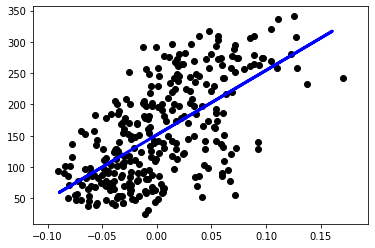

Coefficients: 
 [[1030.62089764]]
Mean squared error:  4095.9143737984323
Coefficient of determination:  0.18642576043332115


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X["bmi"].values, y, random_state = 1, test_size = 0.3)

lr = LinearRegression(n_jobs=7, normalize = True)
lr.fit(X_train.reshape(-1,1), y_train)
y_pred = lr.predict(X_test.reshape(-1,1))

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()


print('Coefficients: \n', lr.coef_)
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Coefficient of determination: ', r2_score(y_test, y_pred))

### Ridge Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.
<center>$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$</center>

In [22]:
ridge = Ridge(alpha = 0.5, normalize = True,  random_state = 1)
ridge.fit(X, y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=1, solver='auto', tol=0.001)

In [23]:
print("The coefficient of Regression line (OLS): ",ridge.coef_[0])
print("The coefficient of Regression intercept (Ridge): ",ridge.intercept_[0])

The coefficient of Regression line (OLS):  [-6.63919370e-02  1.97727409e-02 -6.97325619e-02  2.70914705e+00
 -5.05670990e+00  3.51540510e+00 -8.01302758e-03 -4.67495966e-01
  2.49333879e-02 -2.83817968e-03 -6.49169846e-01  7.39003074e-03
 -3.33471943e-01]
The coefficient of Regression intercept (Ridge):  20.65772209296767
